# Pergunta 6

### Qual o grau de formação mais comum dos docentes? Comparação entre IES particulares e públicas.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
docente_column = ["TP_ESCOLARIDADE", "TP_CATEGORIA_ADMINISTRATIVA"]
docente = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Docente.csv", index_col=False, header=0, usecols=docente_column)

In [3]:
docente["TP_ESCOLARIDADE"] = docente.TP_ESCOLARIDADE.replace([1, 2, 3, 4, 5], ["Sem graduação", "Graduação", "Especialização", "Mestrado", "Doutorado"])

In [4]:
docenteParticular = docente[(docente.TP_CATEGORIA_ADMINISTRATIVA == 4) | (docente.TP_CATEGORIA_ADMINISTRATIVA == 5)
                             | (docente.TP_CATEGORIA_ADMINISTRATIVA == 6)  | (docente.TP_CATEGORIA_ADMINISTRATIVA == 8)
                              | (docente.TP_CATEGORIA_ADMINISTRATIVA == 9)] # TP_CATEGORIA_ADMINISTRATIVA 4, 5, 6, 8 e 9 são de IES particulares

In [5]:
docenteParticular['TP_ESCOLARIDADE'].value_counts().to_dict() # printa a quantidade de docentes de IES particulares separado pelo TP_ESCOLARIDADE

{'Mestrado': 102669,
 'Doutorado': 61365,
 'Especialização': 48924,
 'Graduação': 245,
 'Sem graduação': 8}

O grau de formação mais comum dos docentes em IES particulares é Mestrado (TP_ESCOLARIDADE == 4), com 102.669 docentes.

In [6]:
docentePublico = docente[(docente.TP_CATEGORIA_ADMINISTRATIVA == 1) | (docente.TP_CATEGORIA_ADMINISTRATIVA == 2)
                            | (docente.TP_CATEGORIA_ADMINISTRATIVA == 3)] # TP_CATEGORIA_ADMINISTRATIVA 1, 2 e 3 são de IES públicas

In [7]:
docentePublico['TP_ESCOLARIDADE'].value_counts().to_dict() # printa a quantidade de docentes de IES públicas separado pelo TP_ESCOLARIDADE

{'Doutorado': 120539,
 'Mestrado': 47262,
 'Especialização': 13101,
 'Graduação': 3417,
 'Sem graduação': 5}

O grau de formação mais comum dos docentes em IES públicas é Doutorado (TP_ESCOLARIDADE == 5), com 120.539 docentes.

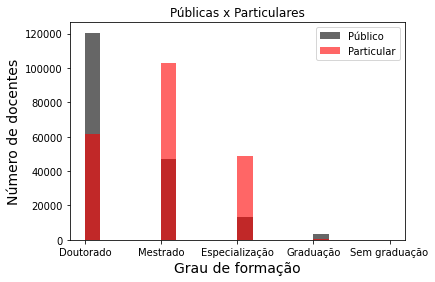

In [8]:
plt.hist(docentePublico['TP_ESCOLARIDADE'], bins=20, alpha=0.6, label="Público", color="black")
plt.hist(docenteParticular['TP_ESCOLARIDADE'], bins=20, alpha=0.6, label="Particular", color="red")

plt.xlabel("Grau de formação", size=14)
plt.ylabel("Número de docentes", size=14)
plt.title("Públicas x Particulares")
plt.legend(loc='upper right')

# Pergunta 7

### Quantos candidatos se candidatam para uma vaga em IES em cada Estado do pais?


In [9]:
curso_column = ["CO_UF", "QT_INSCRITO_TOTAL"]
curso = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Curso.csv", index_col=False, header=0, usecols=curso_column)

In [10]:
# Lógica para dar replace no código UF pelo seu respectivo nome para facilitar o entendimento
curso["CO_UF"] = curso.CO_UF.replace([11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53],
                                     ["Rondônia", "Acre", "Amazonas", "Roraima", "Pará", "Amapá", "Tocantins", "Maranhão", 
                                     "Piauí", "Ceará", "Rio Grande do Norte", "Paraíba", "Pernambuco", "Alagoas", "Sergipe", 
                                     "Bahia", "Minas Gerais", "Espírito Santo", "Rio de Janeiro", "São Paulo", "Paraná", "Santa Catarina", 
                                     "Rio Grande do Sul", "Mato Grosso do Sul", "Mato Grosso", "Goiás", "Distrito Federal"])

In [11]:
curso_grouped = curso.groupby("CO_UF")["QT_INSCRITO_TOTAL"].sum() # Soma a quantidade de inscritos totais para cada UF
print(curso_grouped)

CO_UF
Acre                     67010
Alagoas                 190886
Amapá                    93713
Amazonas                254420
Bahia                   773972
Ceará                   544142
Distrito Federal        342032
Espírito Santo          181524
Goiás                   347583
Maranhão                391890
Mato Grosso             231079
Mato Grosso do Sul      159856
Minas Gerais           1283076
Paraná                  585524
Paraíba                 346174
Pará                    428583
Pernambuco              407233
Piauí                   209702
Rio Grande do Norte     171448
Rio Grande do Sul       443756
Rio de Janeiro          994026
Rondônia                 73404
Roraima                  36427
Santa Catarina          321358
Sergipe                  96296
São Paulo              3291284
Tocantins               113677
Name: QT_INSCRITO_TOTAL, dtype: int64


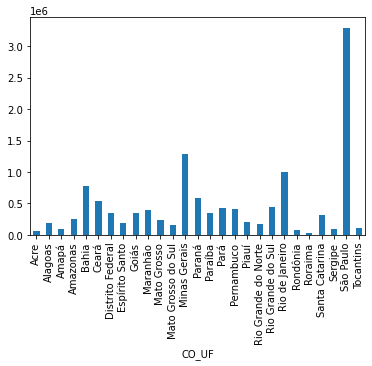

In [12]:
curso_grouped = curso.groupby("CO_UF")["QT_INSCRITO_TOTAL"].sum().plot(kind="bar")

In [13]:
alumn_column = ["ID_ALUNO", "TP_SITUACAO", "TP_MODALIDADE_ENSINO"]
Talunos = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Aluno.csv", index_col=False, header=0, usecols=alumn_column)


In [14]:
valid_situation = [2,3]
alunos = Talunos[Talunos['TP_SITUACAO'].isin(valid_situation)]


# **Pergunta 8**

**Para responder essa pergunta, realizamos uma contagem dos alunos que repetiam, com a ressalva de que eles deveriam estar ou cursando ou com a matrícula trancada.**

In [15]:
alunos['ID_ALUNO'].value_counts().head(10)

1E9323CB6AD381FCB7B376684848D486    13
1B4E3661691EF57DC103A876D7AFE0E6    13
4C916F373F3A26E55F76DEBF99D5ECF7    12
0CE5BBE212117B15F493A59DE6E0BE29    12
ED06F8483F3C984E68001C24974C64F7    11
9D5B68E79A65729829D81A994FDD4CA2    10
38A4A247395BF1C79DCB0FAB5CF22234    10
DB564BFCF9E8A24C1836C62B251880C8     9
3813941103B3D4F5AAD2425E19867A08     9
F1DFEDD900C413053B1E2A8512CCC695     9
Name: ID_ALUNO, dtype: int64

**Podemos ver que temos alguns alunos matriculados em até 13 locias/cursos diferentes, então investigamos e vimos que esses alunos estão com 13 matrículas em cursos a distância.**

In [16]:
alunos[alunos['ID_ALUNO'] == "1E9323CB6AD381FCB7B376684848D486"]

,TP_MODALIDADE_ENSINO,ID_ALUNO,TP_SITUACAO
3321694,2,1E9323CB6AD381FCB7B376684848D486,2
7172422,2,1E9323CB6AD381FCB7B376684848D486,2
7175943,2,1E9323CB6AD381FCB7B376684848D486,2
7221261,2,1E9323CB6AD381FCB7B376684848D486,2
7222011,2,1E9323CB6AD381FCB7B376684848D486,2
7222845,2,1E9323CB6AD381FCB7B376684848D486,2
7223192,2,1E9323CB6AD381FCB7B376684848D486,2
7223393,2,1E9323CB6AD381FCB7B376684848D486,2
7234637,2,1E9323CB6AD381FCB7B376684848D486,2
7235079,2,1E9323CB6AD381FCB7B376684848D486,2


In [17]:
alunos[alunos['ID_ALUNO'] == "1B4E3661691EF57DC103A876D7AFE0E6"]

,TP_MODALIDADE_ENSINO,ID_ALUNO,TP_SITUACAO
1442184,2,1B4E3661691EF57DC103A876D7AFE0E6,2
1469562,2,1B4E3661691EF57DC103A876D7AFE0E6,2
3678863,2,1B4E3661691EF57DC103A876D7AFE0E6,2
3684649,2,1B4E3661691EF57DC103A876D7AFE0E6,2
3687062,2,1B4E3661691EF57DC103A876D7AFE0E6,2
7192974,2,1B4E3661691EF57DC103A876D7AFE0E6,2
7202723,2,1B4E3661691EF57DC103A876D7AFE0E6,2
7226741,2,1B4E3661691EF57DC103A876D7AFE0E6,2
7229020,2,1B4E3661691EF57DC103A876D7AFE0E6,2
7230519,2,1B4E3661691EF57DC103A876D7AFE0E6,2


**Por fim, iremos olhar quantos alunos aparecem 2 ou mais vezes na base de dados. Esse valor estará indicado como True na função abaixo.**

In [18]:
alunos['ID_ALUNO'].duplicated().value_counts()

False    6477456
True      378374
Name: ID_ALUNO, dtype: int64

# Pergunta 9

### Qual o curso com maior desvio padrão em relação às idades dos matriculados?


In [19]:
alumn_column = ["CO_CINE_ROTULO", "NU_IDADE"]
alunos = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Aluno.csv", index_col=False, header=0, usecols=alumn_column, dtype={"CO_CINE_ROTULO": str} )

In [20]:
cine_columns = ["CO_CINE_ROTULO", "NO_CINE_ROTULO"]
cine = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\CINE.CSV", index_col=False, header=0, usecols=cine_columns)

In [21]:
alunos = alunos.merge(cine, on="CO_CINE_ROTULO", how='left') # Demos um merge da tabela de alunos com a tabela de cine para pegar o nome do curso

In [22]:
alunos_grouped = alunos.groupby("NO_CINE_ROTULO").std() # Agrupamos pelo nome do curso e depois realizamos o desvio padrão
std_max = alunos_grouped.max() # Maior desvio padrão

print(alunos_grouped[alunos_grouped["NU_IDADE"] == std_max[0]])

                        NU_IDADE
NO_CINE_ROTULO                  
Comunicaτπo assistiva  18.193405


# Pergunta 10

### Quais os top 10 cursos que têm as idades médias mais baixas? E a mais altas?

In [23]:
alunos_grouped = alunos.groupby("NO_CINE_ROTULO").mean() # Agrupamos pelo nome do curso e depois realizamos a média
mean_max = alunos_grouped.max() # Maior média
mean_min = alunos_grouped.min() # Menor média

In [24]:
top10Max = alunos_grouped.sort_values(by="NU_IDADE", ascending=False).head(10) # Organização dos 10 cursos com maior média de idade

print(top10Max)

                                          NU_IDADE
NO_CINE_ROTULO                                    
CiΩncias da religiπo                     40.050228
Educaτπo especial formaτπo de professor  39.789462
Seguranτa no trΓnsito                    38.872881
Podologia                                38.813048
Produτπo de cerveja                      38.585624
Gerontologia                             38.394387
Teologia                                 38.182078
Gestπo da sa·de                          37.508197
Neg≤cios imobilißrios                    37.389013
Ensino religioso formaτπo de professor   36.505843


In [25]:
top10Min = alunos_grouped.sort_values(by="NU_IDADE", ascending=True).head(10) # Organização dos 10 cursos com menor média de idade

print(top10Min)

                                                  NU_IDADE
NO_CINE_ROTULO                                            
ABI Engenharia, produτπo e construτπo            21.257483
Engenharia de biotecnologia                      21.984169
Engenharia de nanotecnologia                     22.129032
Bioquφmica                                       22.278125
ABI CiΩncias naturais, matemßtica e estatφstica  22.457541
Engenharia de biossistemas                       22.485163
Fφsica aplicada                                  22.493934
Biotecnologia                                    22.688978
Engenharia de bioprocessos                       22.756470
Gestπo de neg≤cios internacionais                22.789548
